<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/SW_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [3]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


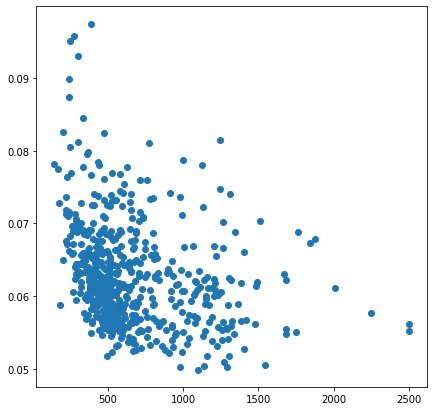

In [5]:
# make a scatters plots to select variables
# many seem to have one center
plt.figure(figsize=(7,7))
plt.scatter(x =df['area_mean'],
            y = df['fractal_dimension_mean'],
           );


In [6]:
# df with pertintent columns
test = df[['area_mean','fractal_dimension_mean']]
test.head()

,area_mean,fractal_dimension_mean
0,1001.0,0.07871
1,1326.0,0.05667
2,1203.0,0.05999
3,386.1,0.09744
4,1297.0,0.05883


In [0]:
# "Instantiate", that is make a local example of KMeals sklearn class, and pick a number of clusters
mykmeans=KMeans(n_clusters=2)

In [8]:
# fit the model to our data
mykmeans.fit(test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# labels
mylabels = mykmeans.labels_
mylabels[:6]

array([0, 0, 0, 1, 0, 1], dtype=int32)

In [10]:
# add labels to test dataframe
test['clusters']=mylabels
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_mean,fractal_dimension_mean,clusters
0,1001.0,0.07871,0
1,1326.0,0.05667,0
2,1203.0,0.05999,0
3,386.1,0.09744,1
4,1297.0,0.05883,0


In [11]:
# define a function to get the centriods
def get_centroids(df, column_header):
    new_centroids = df.groupby(column_header).mean()
    return new_centroids

# get our centriods
centroids=get_centroids(test,'clusters')
centroids

,area_mean,fractal_dimension_mean
clusters,,
0,1211.936290,0.059942
1,499.666966,0.063593


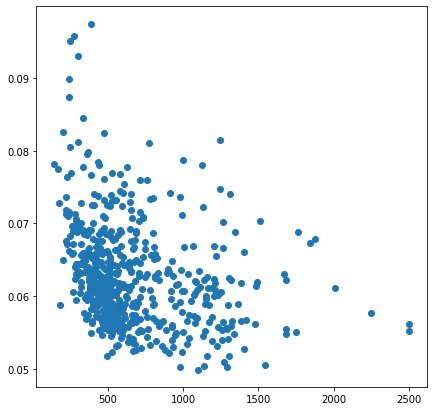

In [12]:
# make a scatters plots to select variables
# many seem to have one center
plt.figure(figsize=(7,7))
plt.scatter(x =df['area_mean'],
            y = df['fractal_dimension_mean'],
           );


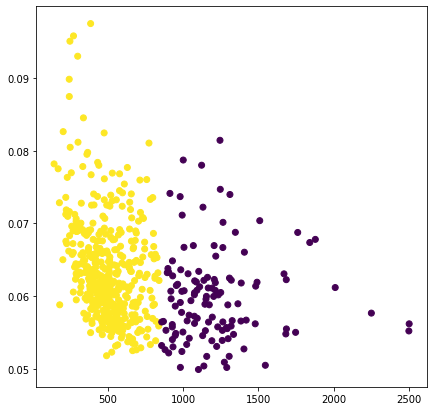

In [13]:
# make a plot ot display the clusters we just found
# Display the clusters we made
plt.figure(figsize=(7,7))
plt.scatter(x =test['area_mean'],
            y = test['fractal_dimension_mean'],
            c = test['clusters']);


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [14]:
dfx = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(dfx.shape)
dfx.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
test['labels']=dfx['diagnosis']
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_mean,fractal_dimension_mean,clusters,labels
0,1001.0,0.07871,0,M
1,1326.0,0.05667,0,M
2,1203.0,0.05999,0,M
3,386.1,0.09744,1,M
4,1297.0,0.05883,0,M


In [16]:
test['clusters'].value_counts()

1    445
0    124
Name: clusters, dtype: int64

In [17]:
test['labels'].value_counts()

B    357
M    212
Name: labels, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


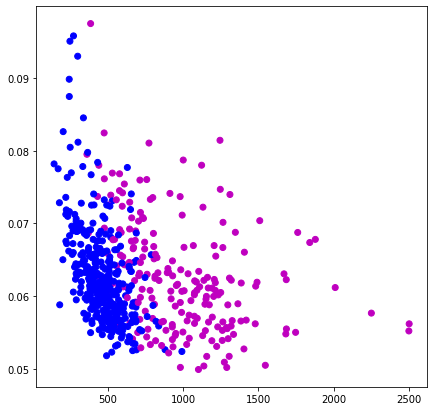

In [18]:
# make a plot ot display the clusters we just found
# Display the clusters we made
plt.figure(figsize=(7,7))
plt.scatter(x =test['area_mean'],
            y = test['fractal_dimension_mean'],
            c = test['labels']);

In [19]:
# compare results with actual data
# NOT WORKING, TIME TO MOVE ALONG
match=0
for i in test['clusters']:
    if test['clusters'][i]==1 and test['labels'][i]=='M':
      match = match+1;
    else: match = match
match
 # if test['clusters'][i]==1 and test['labels'][i]=='M':

0

In [0]:
# # compare results with actual data
# match=0
# for i in test['clusters']:
#     if test['clusters'][i]==1 and test['labels'][i]=='M':
 
#   match = match+1;
#   # elif test['clusters']==0 and test['label']=='B':
#   #      match=match+1;
# else: match = match
# match
#  # if test['clusters'][i]==1 and test['labels'][i]=='M': 

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [21]:
# collect column names for future use
# drop diagnosis and unamed which is a column of nans
my_cols=dfx.columns[2:-1]
my_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
# start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.
from sklearn.preprocessing import StandardScaler

# normalizing the features
x_array= df.loc[:,my_cols].values
x_array= StandardScaler().fit_transform(x_array) 
x_array

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [23]:
# verify that the data is normalized, rounded to 2 decimal places
print('{:.2f}'.format(np.mean(x_array)))

# is the std 1?
print('{:.2f}'.format(np.std(x_array)))

0.00
1.00


In [24]:
# make a new dataframe of the normalized data
norm_df= pd.DataFrame(x_array, columns=my_cols)
norm_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Begin PCA analysis


In [0]:
# import sklearn PCA module
# The value of PCA 1 and 2 will remain the same, even with more components created
from sklearn.decomposition import PCA

# intialize the pca model
mypca = PCA(n_components=10) 

In [56]:
# call fit_transform on the aggregate data
pca_data = mypca.fit_transform(x_array)
pca_data

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840998,
        -0.15710844, -0.8773954 ],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098855,
        -0.71191047,  1.10699385],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.0973739 ,
         0.02406931,  0.45427826],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188774,
         0.39391404,  0.52087511],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28024041,
        -0.54202774, -0.08929141],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635022,
         0.37410817, -0.0477162 ]])

In [57]:
# check out the explained variance ratio
print(mypca.explained_variance_ratio_)

# how much data was explained?
mypca.explained_variance_ratio_.sum()

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


0.9515688143348289

In [58]:
# define the number of components
num_components=len(mypca.explained_variance_ratio_)
num_components

10

In [59]:
# create a numpy array as long as the number of components
comp_counter = np.arange(num_components) 
comp_counter

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
# create an array of 10 pca values
pca_vals = mypca.explained_variance_ratio_
pca_vals

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [61]:
# create a DataFrame with principal component values for all 569 samples
pca_data_all = pca_data
df_final = pd.DataFrame(data=pca_data,columns=['component_1', 'component_2','component_3','component_4', 'component_5','component_6','component_7', 'component_8','component_9','component_10'])
df_final.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398410,-0.157108,-0.877395
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711910,1.106994
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024069,0.454278
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059567,-1.405441,-1.116976
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263808,0.377702


In [71]:
# create smaller dataframe for clustering and graphing
# HOW TO TURN THIS INTO A COPY
pca_2_df= pd.DataFrame.copy(df_final[['component_1','component_2']])
pca_2_df.head()

,component_1,component_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [0]:
# set up kmeans with 2 clusters
mykmeans=KMeans(n_clusters=2, max_iter=10)

In [67]:
# fit the model to df with only first two PCA values
mykmeans.fit(pca_2_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
# labels
mylabels_2 = mykmeans.labels_
mylabels_2[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [73]:
# add labels to dataframe
pca_2_df['clusters']=mylabels_2
pca_2_df.head()

,component_1,component_2,clusters
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


In [74]:
# use function defined above to get the centriods
# def get_centroids(df, column_header):
#     new_centroids = df.groupby(column_header).mean()
#     return new_centroids

# get our centriods
centroids=get_centroids(pca_2_df,'clusters')
centroids

,component_1,component_2
clusters,,
0,-2.202478,-0.021716
1,4.358830,0.042977


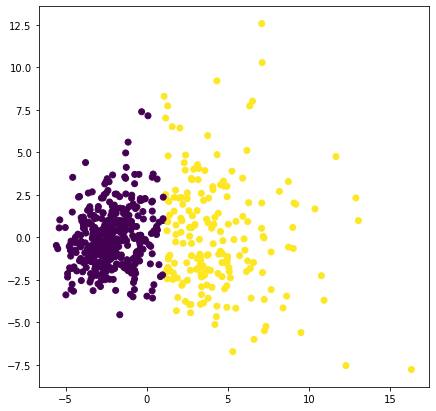

In [75]:
# make a plot ot display the clusters we just found
# Display the clusters we made
plt.figure(figsize=(7,7))
plt.scatter(x =pca_2_df['component_1'],
            y = pca_2_df['component_2'],
            c = pca_2_df['clusters']);

Resume PCA with multiple components

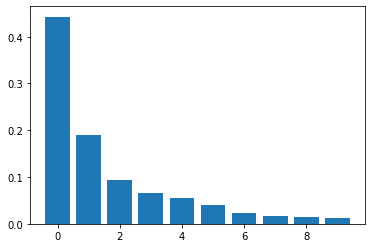

In [76]:
# Plot the variance explained by each component.

plt.bar(comp_counter,pca_vals);

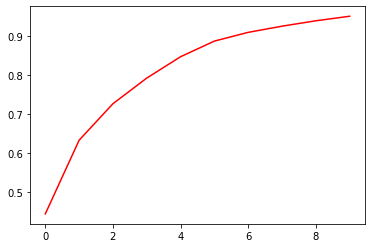

In [77]:
# Plot the cumulative variance explained by all the components.

cumvals = np.cumsum(pca_vals)
plt.plot(comp_counter, cumvals, c='r');

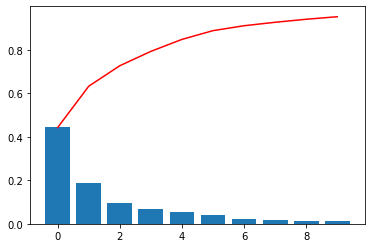

In [78]:
# plot together
# what is the point of the fancy scree plot?
# perhaps just good plotting practice
plt.bar(comp_counter,pca_vals);
plt.plot(comp_counter, cumvals, c='r');

In [82]:
# check some totals to decide how many clusters to use
# I would choose 3, less than 10% difference to 4
# however, the goal is 90%+
print(pca_vals[:1].sum())
print(pca_vals[:2].sum())
print(pca_vals[:3].sum())
print(pca_vals[:4].sum())
print(pca_vals[:5].sum())
print(pca_vals[:6].sum())
print(pca_vals[:7].sum())

0.44272025607526394
0.6324320765155951
0.7263637090899089
0.7923850582446106
0.8473427431680732
0.8875879635669067
0.9100953006967312


In [0]:
# "Instantiate", that is make a local example of KMeals sklearn class, and pick a number of clusters
mykmeans=KMeans(n_clusters=7, max_iter=10)

In [84]:
# fit the model to our data
mykmeans.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [85]:
# Assign predicted clusters back to our dataframe
df_final['clusters'] = mykmeans.labels_
df_final

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,clusters
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398410,-0.157108,-0.877395,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711910,1.106994,5
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024069,0.454278,5
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059567,-1.405441,-1.116976,2
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263808,0.377702,5
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035468,0.987922,0.256982,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113358,-0.105212,-0.108637,5
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341888,0.393914,0.520875,5
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280240,-0.542028,-0.089291,0


In [88]:
# the metrics module will be your best friend
from sklearn import metrics 

# Find the silhouette_score
metrics.silhouette_score(df_final, mykmeans.labels_, metric='euclidean')

# score indicates that the clusters are relatively close to one another

0.22313137102969563

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project